### 处理一下预测结果

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 5)

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',  # 使用衬线字体
    'font.serif': ['Times New Roman'],  # 指定 Times New Roman 字体
    'font.size': 12,
    'text.usetex': False,
    'axes.labelsize': 13,
    'axes.titlesize': 15,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'legend.fontsize': 11,
    'legend.title_fontsize': 12,
    'savefig.bbox': 'tight',
    # 'lines.linewidth': 2,
    # 'lines.markersize': 6,
    # 'grid.linewidth': 1,
    # 'axes.linewidth': 1
})
sns.set_style("whitegrid")
flierprops = dict(marker='o', markersize=3, linestyle='none')

#### 1. 读数据

In [2]:
fig_dir = "/home/zhaoy/asset-fastCAE/results/vvenc/figs"
table_dir = "/home/zhaoy/asset-fastCAE/results/vvenc/tables"

rlt_df  = pd.read_csv(f"{table_dir}/predCurve/all_rlts.csv")
display(rlt_df)

,preset,input,regressor,train_rmse,train_r2,train_evs,test_rmse,test_r2,test_evs,func,target
0,medium,faster,RandomForestRegressor,0.022573,[0.99924011 0.99927013],[0.99924019 0.99927033],1.189859,[0.99559192 0.99338425],[0.99616074 0.99508897],linear,bitrate
1,slower,faster,RandomForestRegressor,0.023453,[0.99921221 0.99920314],[0.99921222 0.99920327],1.059084,[0.99501266 0.99448442],[0.99506518 0.9951115 ],linear,bitrate
...,...,...,...,...,...,...,...,...,...,...,...
862,faster,slower,RMSProp,0.000017,[0.71699922 0.53813156],[0.89523179 0.57939805],0.000895,[ 0.72653592 -0.08516326],[0.82238094 0.59668137],quadratic2,log2vmaf
863,medium,slower,RMSProp,0.000007,[0.92095465 0.88675898],[0.9460297 0.88706984],0.000495,[0.777622 0.47471734],[0.8695266 0.82937867],quadratic2,log2vmaf


In [10]:
pred_df = pd.read_csv(f"{table_dir}/predCurve/all_preds.csv")
# pred_df = pred_df.sort_values(["regressor", "seqName", "sceneId", "preset", "size"]).reset_index(drop=True)
pred_df = pred_df.sort_values(["regressor", "seqName", "sceneId", "preset"]).reset_index(drop=True)
display(pred_df)

,seqName,sceneId,size,regressor,input,preset,p1,p2,pred_p1,pred_p2,func,target
0,Lecture-42c3,0,1080P,Adam,faster,faster,-30.571893,1576.732812,-30.571893,1576.732812,linear,bitrate
1,Lecture-42c3,0,360P,Adam,faster,faster,-11.305822,558.039513,-11.305822,558.039513,linear,bitrate
...,...,...,...,...,...,...,...,...,...,...,...,...
114046,Lecture-7e40,1,540P,SGDRegressor,slower,slower,-0.000203,6.772879,-0.000203,6.772879,quadratic2,log2vmaf
114047,Lecture-7e40,1,720P,SGDRegressor,slower,slower,-0.000175,6.748989,-0.000175,6.748989,quadratic2,log2vmaf


In [5]:
pred_df["seqName"].unique().tolist()

['Lecture-42c3',
 'Lecture-4bb4',
 'Lecture-5f3a',
 'Lecture-6d29',
 'Lecture-7e40']

In [11]:
enc_df  = pd.read_csv(f"{table_dir}/encInfo.csv")
display(enc_df)

# 找出在测试集中的序列
enc_df = enc_df[enc_df["seqName"].isin(pred_df["seqName"].unique())]
# enc_df = enc_df.sort_values(["seqName", "sceneId", "preset", "size"]).reset_index(drop=True)
enc_df = enc_df.sort_values(["seqName", "sceneId", "preset"]).reset_index(drop=True)
display(enc_df)

,seqName,sceneId,qp,preset,size,nframes,bitrate,psnr,ssim,vmaf,log2psnr,log2ssim,log2bitrate,log2vmaf,bpp
0,Lecture-1033,0,32,faster,360P,281,57.8571,47.754628,0.997213,95.285921,5.577569,-0.004026,5.854422,6.574191,0.008371
1,Lecture-1033,2,27,faster,360P,285,190.5078,49.755053,0.995836,95.477799,5.636771,-0.006020,7.573706,6.577093,0.027562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25022,Lecture-07e0,1,52,faster,1080P,67,107.3409,30.605672,0.946040,56.786558,4.935727,-0.080027,6.746056,5.827478,0.001726
25023,Lecture-07e0,0,27,faster,1080P,534,1331.7007,47.422266,0.994509,94.862555,5.567493,-0.007944,10.379054,6.567767,0.021407


,seqName,sceneId,qp,preset,size,nframes,bitrate,psnr,ssim,vmaf,log2psnr,log2ssim,log2bitrate,log2vmaf,bpp
0,Lecture-42c3,0,22,faster,360P,49,364.8000,49.133061,0.995155,96.942168,5.618622,-0.007007,8.510962,6.599052,0.052778
1,Lecture-42c3,0,47,faster,360P,49,31.0188,29.786531,0.834029,60.359113,4.896588,-0.261831,4.955071,5.915500,0.004488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,Lecture-7e40,1,37,slower,1080P,103,440.9965,43.643204,0.990372,93.891365,5.447685,-0.013958,8.784623,6.552921,0.007089
1847,Lecture-7e40,1,32,slower,1080P,103,707.7996,46.102233,0.993498,96.019605,5.526765,-0.009410,9.467197,6.585257,0.011378


In [7]:
pd.set_option('display.max_rows', 6)
pred_df["regressor"].unique()

array(['Adam', 'LinearRegression', 'LinearSVR', 'RMSProp',
       'RandomForestRegressor', 'SGDRegressor'], dtype=object)

In [8]:
pred_df["func"].unique()

array(['linear', 'power', 'quadratic2'], dtype=object)

#### 2. 把真实值和预测值合并在一个表里

In [12]:
from fastCAE.utils import func_linear, func_pw2, func_quad2, func_quad3
from tqdm import tqdm

qps = range(22, 57, 5)
func_dict = {
    "linear": func_linear,
    "power": func_pw2,
    "quadratic2": func_quad2,
    "quadratic3": func_quad3
}

rows = []
cols = pred_df.columns.tolist()
for idx, row in tqdm(pred_df.iterrows()):
    func = row['func']
    target = row['target']
    
    base_row = row.to_dict()
    
    for qp in qps:
        expanded_row = base_row.copy()
        expanded_row["qp"] = qp
        try:
            if func == "quadratic3":
                expanded_row[f"pred_target"] = func_dict[func](qp, row["pred_p1"], row['pred_p2'], row['pred_p3'])
            else:
                expanded_row[f"pred_target"] = func_dict[func](qp, row["pred_p1"], row['pred_p2'])
        except Exception as e:
            print(f"{e} ({row}, qp: {qp})")
        rows.append(expanded_row)
        
pred_df = pd.DataFrame(rows)
display(pred_df)

18895it [00:04, 4124.54it/s]/home/zhaoy/encCAE/fastCAE/utils.py:8: RuntimeWarning: overflow encountered in power
  return A * np.power(x, k)
114048it [00:35, 3205.56it/s]


,seqName,sceneId,size,regressor,input,preset,p1,p2,pred_p1,pred_p2,func,target,qp,pred_target
0,Lecture-42c3,0,1080P,Adam,faster,faster,-30.571893,1576.732812,-30.571893,1576.732812,linear,bitrate,22,904.151161
1,Lecture-42c3,0,1080P,Adam,faster,faster,-30.571893,1576.732812,-30.571893,1576.732812,linear,bitrate,27,751.291694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798334,Lecture-7e40,1,720P,SGDRegressor,slower,slower,-0.000175,6.748989,-0.000175,6.748989,quadratic2,log2vmaf,47,6.362787
798335,Lecture-7e40,1,720P,SGDRegressor,slower,slower,-0.000175,6.748989,-0.000175,6.748989,quadratic2,log2vmaf,52,6.276246


In [13]:
enc_df.columns

Index(['seqName', 'sceneId', 'qp', 'preset', 'size', 'nframes', 'bitrate',
       'psnr', 'ssim', 'vmaf', 'log2psnr', 'log2ssim', 'log2bitrate',
       'log2vmaf', 'bpp'],
      dtype='object')

In [14]:
pred_df.columns

Index(['seqName', 'sceneId', 'size', 'regressor', 'input', 'preset', 'p1',
       'p2', 'pred_p1', 'pred_p2', 'func', 'target', 'qp', 'pred_target'],
      dtype='object')

In [ ]:
pred_df = pred_df.merge(
    enc_df[["seqName", "sceneId", "preset", "size", "qp", "bitrate", "log2bitrate", "psnr", "log2psnr", "ssim", "log2ssim", "vmaf", "log2vmaf"]],
    on=["seqName", "sceneId", "preset", "qp", "size"], how="inner"
)

In [16]:
pred_df = pred_df.sort_values(["regressor", "seqName", "sceneId", "preset", "size"]).reset_index(drop=True)

display(pred_df)
pred_df.columns

,seqName,sceneId,size,regressor,input,preset,p1,p2,pred_p1,pred_p2,...,qp,pred_target,bitrate,log2bitrate,psnr,log2psnr,ssim,log2ssim,vmaf,log2vmaf
0,Lecture-42c3,0,1080P,Adam,faster,faster,-30.571893,1576.732812,-30.571893,1576.732812,...,22,904.151161,1038.4604,10.020230,54.06102,5.756517,0.998422,-0.002279,97.265945,6.603863
1,Lecture-42c3,0,1080P,Adam,medium,faster,-30.571893,1576.732812,-56.048077,1667.334717,...,22,434.277031,1038.4604,10.020230,54.06102,5.756517,0.998422,-0.002279,97.265945,6.603863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798334,Lecture-7e40,1,720P,SGDRegressor,medium,slower,-0.000175,6.748989,-0.000182,6.742905,...,52,6.250952,57.5278,5.846187,32.51932,5.023225,0.944059,-0.083052,73.387421,6.197461
798335,Lecture-7e40,1,720P,SGDRegressor,slower,slower,-0.000175,6.748989,-0.000175,6.748989,...,52,6.276246,57.5278,5.846187,32.51932,5.023225,0.944059,-0.083052,73.387421,6.197461


Index(['seqName', 'sceneId', 'size', 'regressor', 'input', 'preset', 'p1',
       'p2', 'pred_p1', 'pred_p2', 'func', 'target', 'qp', 'pred_target',
       'bitrate', 'log2bitrate', 'psnr', 'log2psnr', 'ssim', 'log2ssim',
       'vmaf', 'log2vmaf'],
      dtype='object')

In [17]:
pred_df["err"] = pred_df.apply(lambda x: x[x["target"]] - x["pred_target"], axis=1)
display(pred_df)

pred_df.to_csv(f"{table_dir}/predCurve/combined_preds.csv", index=False)

,seqName,sceneId,size,regressor,input,preset,p1,p2,pred_p1,pred_p2,...,pred_target,bitrate,log2bitrate,psnr,log2psnr,ssim,log2ssim,vmaf,log2vmaf,err
0,Lecture-42c3,0,1080P,Adam,faster,faster,-30.571893,1576.732812,-30.571893,1576.732812,...,904.151161,1038.4604,10.020230,54.06102,5.756517,0.998422,-0.002279,97.265945,6.603863,134.309239
1,Lecture-42c3,0,1080P,Adam,medium,faster,-30.571893,1576.732812,-56.048077,1667.334717,...,434.277031,1038.4604,10.020230,54.06102,5.756517,0.998422,-0.002279,97.265945,6.603863,604.183369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798334,Lecture-7e40,1,720P,SGDRegressor,medium,slower,-0.000175,6.748989,-0.000182,6.742905,...,6.250952,57.5278,5.846187,32.51932,5.023225,0.944059,-0.083052,73.387421,6.197461,-0.053491
798335,Lecture-7e40,1,720P,SGDRegressor,slower,slower,-0.000175,6.748989,-0.000175,6.748989,...,6.276246,57.5278,5.846187,32.51932,5.023225,0.944059,-0.083052,73.387421,6.197461,-0.078785


In [18]:
display(pred_df[pred_df["target"] == "log2bitrate"].reset_index(drop=True))

,seqName,sceneId,size,regressor,input,preset,p1,p2,pred_p1,pred_p2,...,pred_target,bitrate,log2bitrate,psnr,log2psnr,ssim,log2ssim,vmaf,log2vmaf,err
0,Lecture-42c3,0,1080P,Adam,faster,faster,-0.115368,12.692217,-0.115368,12.692217,...,10.154127,1038.4604,10.020230,54.06102,5.756517,0.998422,-0.002279,97.265945,6.603863,-0.133897
1,Lecture-42c3,0,1080P,Adam,medium,faster,-0.115368,12.692217,-0.130149,12.639707,...,9.776436,1038.4604,10.020230,54.06102,5.756517,0.998422,-0.002279,97.265945,6.603863,0.243794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99790,Lecture-7e40,1,720P,SGDRegressor,medium,slower,-0.002009,11.083296,-0.002006,11.187656,...,5.763376,57.5278,5.846187,32.51932,5.023225,0.944059,-0.083052,73.387421,6.197461,0.082812
99791,Lecture-7e40,1,720P,SGDRegressor,slower,slower,-0.002009,11.083296,-0.002009,11.083296,...,5.650314,57.5278,5.846187,32.51932,5.023225,0.944059,-0.083052,73.387421,6.197461,0.195873


In [14]:
pred_df.columns

Index(['seqName', 'sceneId', 'regressor', 'input', 'preset', 'p1', 'p2',
       'pred_p1', 'pred_p2', 'func', 'target', 'qp', 'pred_target', 'size',
       'bitrate', 'log2bitrate', 'psnr', 'log2psnr', 'ssim', 'log2ssim',
       'vmaf', 'log2vmaf', 'err'],
      dtype='object')

In [19]:
def rm_outliers(df, cols, threshold=1.5, lower_only=False):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)

        if lower_only:
            df = df[df[col] >= lower_bound]
        else:
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [18]:
pred_df = pd.read_csv(f"{table_dir}/predCurve/combined_preds.csv")

##### bitrate / log2bitrate 最适合 quadratic2 函数拟合，然后用任意一种 regressor 效果都差不多

<Axes: xlabel='func', ylabel='err'>

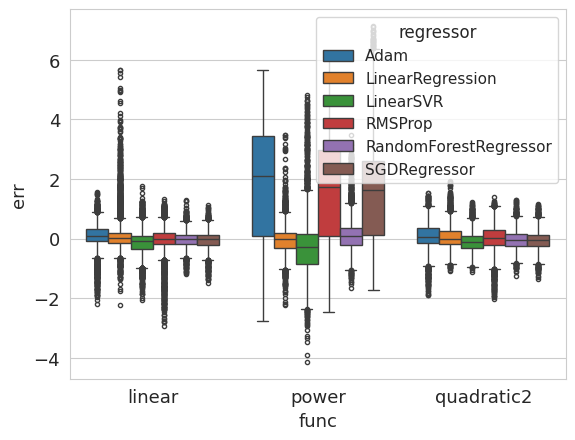

In [20]:
sns.boxplot(data=pred_df[pred_df["target"] == "log2bitrate"], x="func", y="err", hue="regressor", flierprops=flierprops)

<Axes: xlabel='func', ylabel='err'>

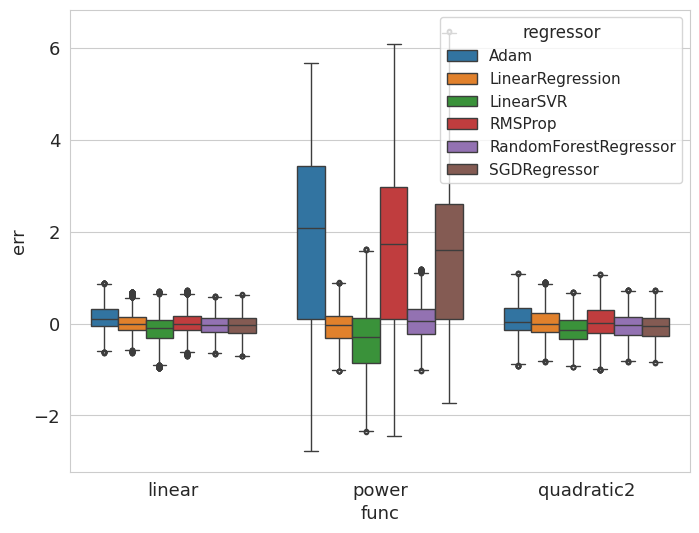

In [21]:
plt.figure(figsize=(8, 6))
log2bitrate_df = pred_df[pred_df["target"] == "log2bitrate"]

log2bitrate_df_cleaned = pd.DataFrame()
for regressor in log2bitrate_df["regressor"].unique():
    for func in log2bitrate_df["func"].unique():
        df = log2bitrate_df[(log2bitrate_df["func"] == func) & (log2bitrate_df["regressor"] == regressor)]
        df = rm_outliers(df, cols=["err"], threshold=1.5)
        
        log2bitrate_df_cleaned = pd.concat([log2bitrate_df_cleaned, df], ignore_index=True)

sns.boxplot(data=log2bitrate_df_cleaned, x="func", y="err", hue="regressor", flierprops=flierprops)

(-1500.0, 2000.0)

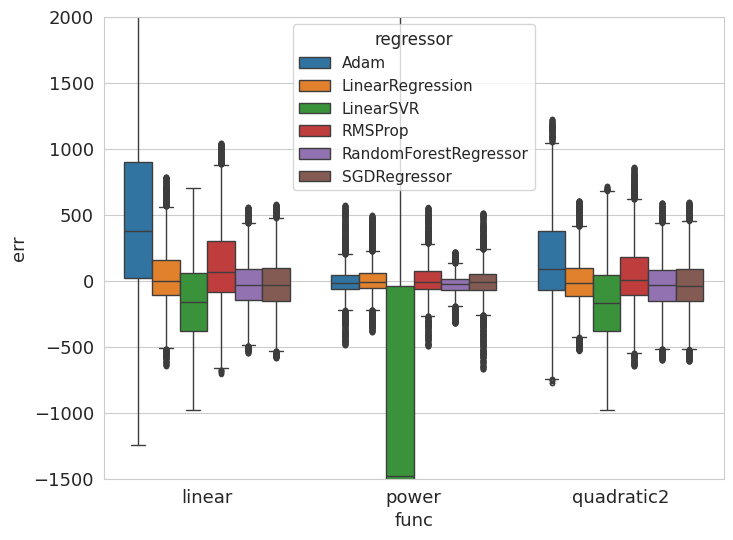

In [22]:
plt.figure(figsize=(8, 6))
bitrate_df = pred_df[pred_df["target"] == "bitrate"]

bitrate_df_cleaned = pd.DataFrame()
for regressor in bitrate_df["regressor"].unique():
    for func in bitrate_df["func"].unique():
        df = bitrate_df[(bitrate_df["func"] == func) & (bitrate_df["regressor"] == regressor)]
        df = rm_outliers(df, cols=["err"], threshold=1.25)
        bitrate_df_cleaned = pd.concat([bitrate_df_cleaned, df], ignore_index=True)
        
sns.boxplot(data=bitrate_df_cleaned, x="func", y="err", hue="regressor", flierprops=flierprops)
plt.ylim(-1500, 2000)

##### log2psnr 最适合 quadratic2 函数拟合，然后用任意一种 regressor 效果都差不多

<Axes: xlabel='func', ylabel='err'>

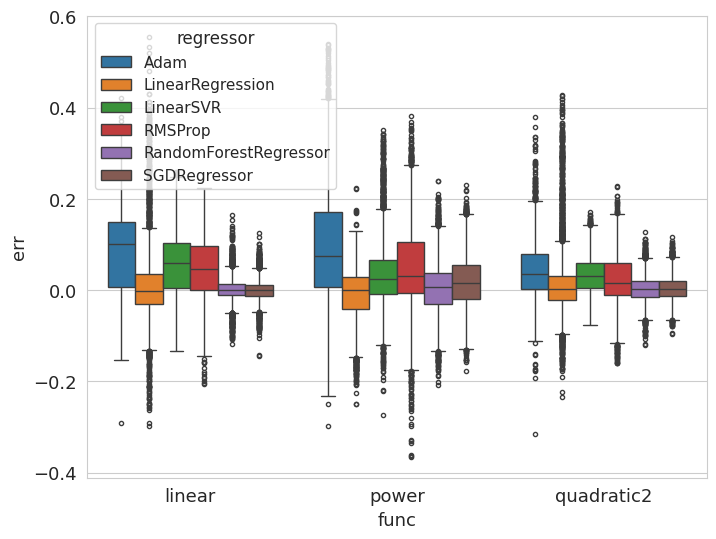

In [23]:
plt.figure(figsize=(8, 6))
psnr_df = pred_df[pred_df["target"] == "psnr"]

psnr_df_cleaned = pd.DataFrame()
for regressor in psnr_df["regressor"].unique():
    for func in psnr_df["func"].unique():
        df = psnr_df[(psnr_df["func"] == func) & (psnr_df["regressor"] == regressor)]
        df = rm_outliers(df, cols=["err"], threshold=1.25)
        psnr_df_cleaned = pd.concat([psnr_df_cleaned, df], ignore_index=True)
sns.boxplot(data=pred_df[pred_df["target"] == "log2psnr"], x="func", y="err", hue="regressor", flierprops=flierprops)

##### log2ssim 最适合 quadratic2 或 linear 函数拟合，然后用任意一种 regressor 效果都差不多

(-0.5, 0.5)

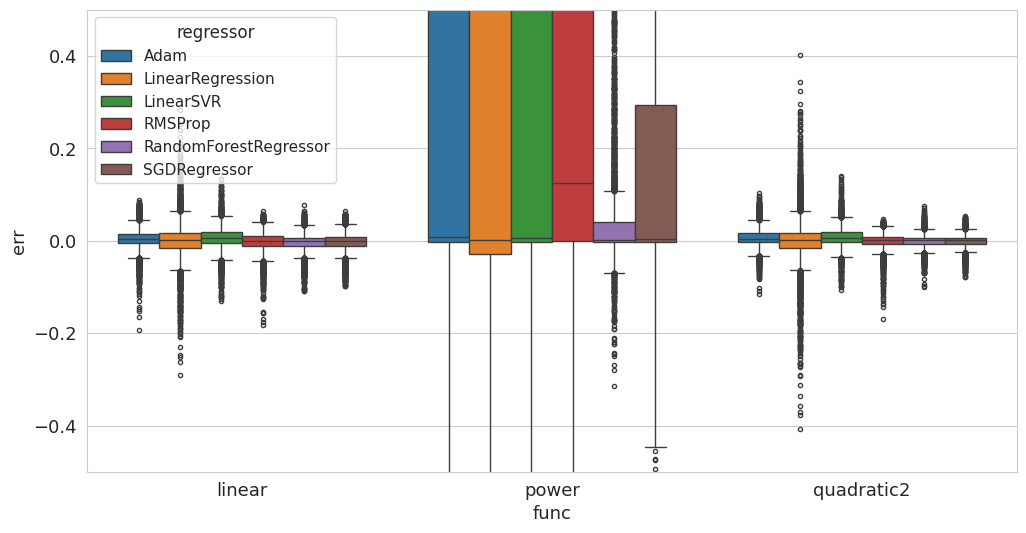

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=pred_df[pred_df["target"] == "log2ssim"], x="func", y="err", hue="regressor", flierprops=flierprops)
plt.ylim(-0.5, 0.5)

##### log2vmaf 最适合 quadratic2 或 linear 函数拟合，然后用任意一种 regressor 效果都差不多

<Axes: xlabel='func', ylabel='err'>

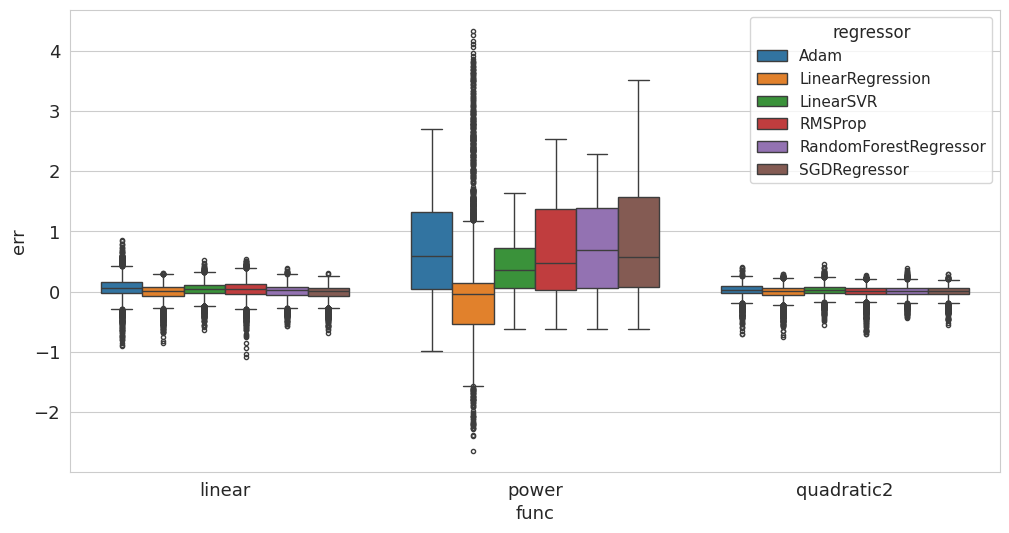

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=pred_df[pred_df["target"] == "log2vmaf"], x="func", y="err", hue="regressor", flierprops=flierprops)
# plt.ylim(-0.3, 0.3)